In [16]:
#importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset
df = pd.read_csv(r"C:\Users\hibas\Desktop\Self_Learning\Project_3_Gender_Pay_Gap_Analysis\Glassdoor Gender Pay Gap.csv")
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,Salary,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [17]:
#Understand the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   Salary     1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [18]:
df.describe()

,Age,PerfEval,Seniority,Salary,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


In [7]:
df.isnull().sum()

JobTitle     0
Gender       0
Age          0
PerfEval     0
Education    0
Dept         0
Seniority    0
BasePay      0
Bonus        0
dtype: int64

In [19]:
#Data Cleaning

# Drop missing salary data
df = df.dropna(subset=['Salary'])

# Remove duplicates if any
df = df.drop_duplicates()

# Convert Gender to proper case
df['Gender'] = df['Gender'].str.title()


In [20]:
#Basic Analysis

#Average salary by gender
avg_salary = df.groupby('Gender')['Salary'].mean()
print("Average Salary by Gender:\n", avg_salary)


Average Salary by Gender:
 Gender
Female    89942.818376
Male      98457.545113
Name: Salary, dtype: float64


In [21]:
# Calculate Pay Gap
if 'Male' in avg_salary and 'Female' in avg_salary:
    gap = avg_salary['Male'] - avg_salary['Female']
    percent_gap = (gap / avg_salary['Male']) * 100
    higher_gender = 'Male' if gap > 0 else 'Female'
    print(f"\n Average Pay Gap: {abs(gap):.2f}")
    print(f" Percentage Gap: {abs(percent_gap):.2f}% ({higher_gender}s earn more)")
else:
    print("\n Gender categories may differ; check df['Gender'].unique()")


💰 Average Pay Gap: 8514.73
📉 Percentage Gap: 8.65% (Males earn more)


In [22]:
#Data Visualization

sns.set(style="whitegrid")

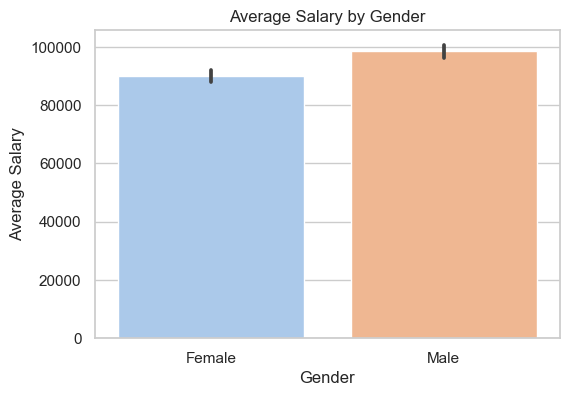

In [25]:
#Average Salary by Gender
plt.figure(figsize=(6,4))
sns.barplot(x='Gender', y='Salary', data=df, palette='pastel')
plt.title('Average Salary by Gender')
plt.ylabel('Average Salary')
plt.xlabel('Gender')
plt.show()

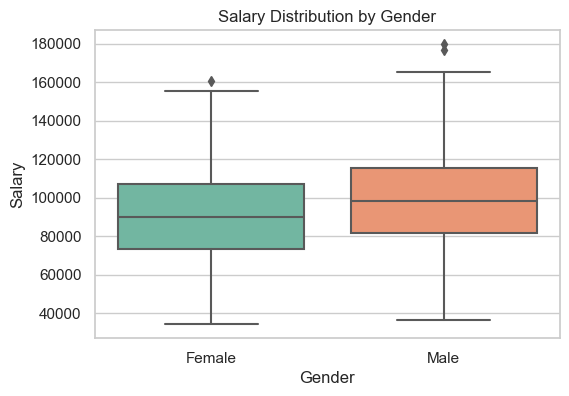

In [26]:
#BasePay Distribution by Gender
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='Salary', data=df, palette='Set2')
plt.title('Salary Distribution by Gender')
plt.ylabel('Salary')
plt.xlabel('Gender')
plt.show()

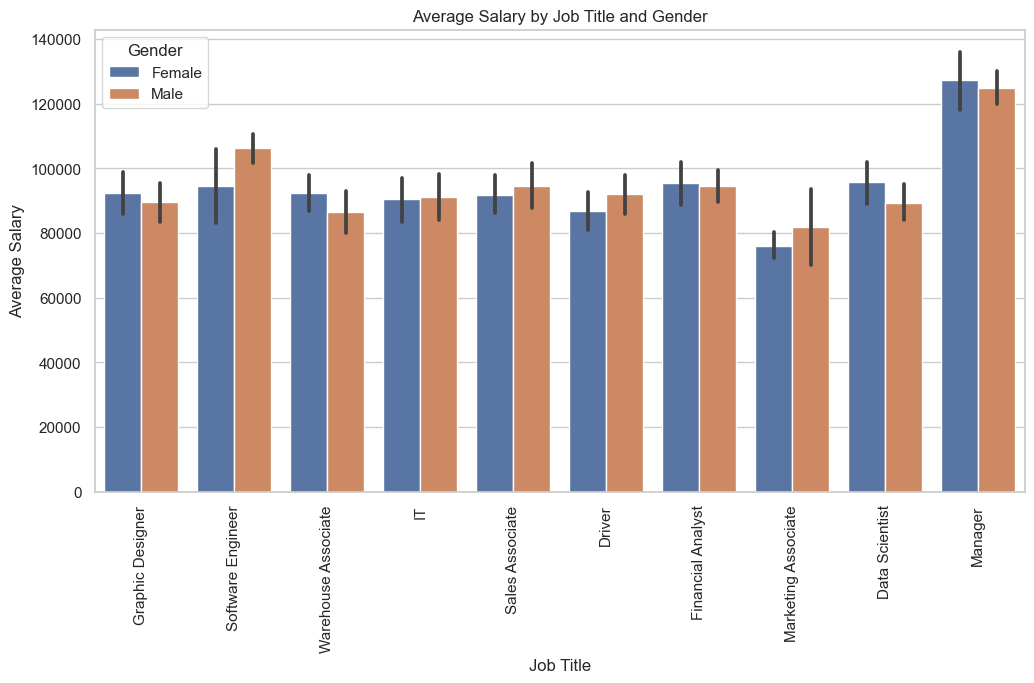

In [27]:
#Salary by Job Title and Gender
if 'JobTitle' in df.columns:
    plt.figure(figsize=(12,6))
    sns.barplot(x='JobTitle', y='Salary', hue='Gender', data=df)
    plt.title('Average Salary by Job Title and Gender')
    plt.xticks(rotation=90)
    plt.ylabel('Average Salary')
    plt.xlabel('Job Title')
    plt.show()
else:
    print("\n Column 'JobTitle' not found; skipping that visualization.")


In [28]:
#Summary

print("\n Data Cleaning Completed")
print(" Visualizations Generated Successfully")
print("Use df.head() or df.describe() to explore the cleaned dataset.")


 Data Cleaning Completed
 Visualizations Generated Successfully
Use df.head() or df.describe() to explore the cleaned dataset.


In [33]:
 df.describe()

,Age,PerfEval,Seniority,Salary,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000
